In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('nature')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('default')
plt.style.use('science')
plt.style.use('notebook')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [4]:
results = pd.read_csv('results.csv', comment = ";")
results

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),oisorat,oisorat_low,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.325,0.065,8.794,0.082,9.7214,0.52,-0.11,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.13,-0.09
1,HD 182040,dlHdC,5750,9.148,0.110,8.005,0.083,9.7570,0.58,-0.24,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.51,-0.15,-0.21
2,C38,dlHdC,5750,9.471,0.086,9.046,0.089,10.1510,0.73,-0.21,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.774,0.089,8.254,0.089,9.4370,0.52,-0.18,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.262,0.113,8.729,0.093,9.7690,0.64,-0.23,0.35,0.6080,-0.1050,0.1010,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.312,0.137,8.837,0.121,9.8690,0.29,-0.15,0.29,0.7770,-0.1450,0.0980,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21*,RCB,5000,8.013,0.118,7.730,0.126,8.6300,6.85,-1.77,2.30,0.1280,-0.0310,0.0360,-0.92,-1.37,-1.69,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.896,0.136,7.442,0.088,8.6500,7.18,-2.76,6.38,0.1230,-0.0540,0.0630,-0.80,-0.80,-0.85,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,7.275,0.214,7.858,0.129,8.9300,69.03,-34.66,227.74,0.0145,-0.0113,0.0139,-0.92,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.990,0.140,7.520,0.140,8.4900,92.93,-55.18,500.00,0.0105,-0.0105,0.0154,-1.05,-1.23,-1.75,-1.75,0.01,-0.57


In [5]:
teffs = results['Teff']
types = results['Type']
names = results['Star']

In [6]:
cs = ['#FF7F0E' if typ == "RCB" else '#1F77B4' for typ in types]
labels = ['RCB' if typ == "RCB" else 'dLHdC' for typ in types]

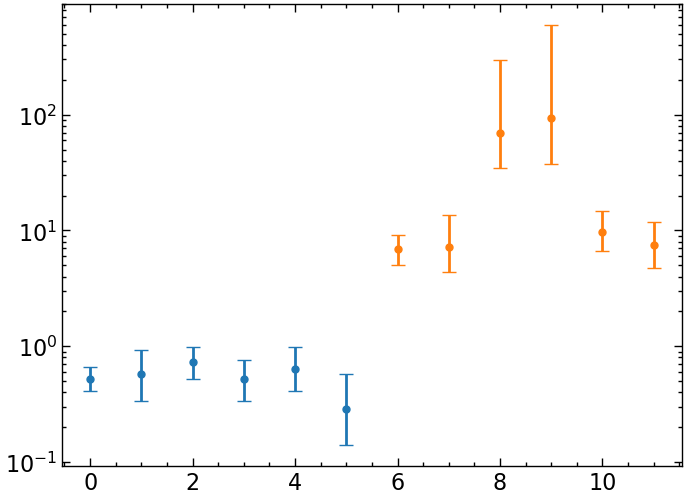

In [7]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(xs, oisorats, 'o')
for i in range(len(oisorats)):
    plt.errorbar(xs[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
plt.yscale('log')

In [8]:
results_mod = results.copy()
results_mod

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),oisorat,oisorat_low,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.325,0.065,8.794,0.082,9.7214,0.52,-0.11,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.13,-0.09
1,HD 182040,dlHdC,5750,9.148,0.110,8.005,0.083,9.7570,0.58,-0.24,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.51,-0.15,-0.21
2,C38,dlHdC,5750,9.471,0.086,9.046,0.089,10.1510,0.73,-0.21,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.774,0.089,8.254,0.089,9.4370,0.52,-0.18,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.262,0.113,8.729,0.093,9.7690,0.64,-0.23,0.35,0.6080,-0.1050,0.1010,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.312,0.137,8.837,0.121,9.8690,0.29,-0.15,0.29,0.7770,-0.1450,0.0980,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21*,RCB,5000,8.013,0.118,7.730,0.126,8.6300,6.85,-1.77,2.30,0.1280,-0.0310,0.0360,-0.92,-1.37,-1.69,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.896,0.136,7.442,0.088,8.6500,7.18,-2.76,6.38,0.1230,-0.0540,0.0630,-0.80,-0.80,-0.85,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,7.275,0.214,7.858,0.129,8.9300,69.03,-34.66,227.74,0.0145,-0.0113,0.0139,-0.92,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.990,0.140,7.520,0.140,8.4900,92.93,-55.18,500.00,0.0105,-0.0105,0.0154,-1.05,-1.23,-1.75,-1.75,0.01,-0.57


In [9]:
teffs = results_mod['Teff']
types = results_mod['Type']
names = results_mod['Star']

In [10]:
teffs.iloc[4] -= 50
teffs.iloc[1] += 50
teffs.iloc[-2] += 50
teffs.iloc[-1] -= 50
teffs.iloc[0] -= 50
teffs.iloc[5] +=50

/tmp/ipykernel_1135525/3123057099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[4] -= 50
/tmp/ipykernel_1135525/3123057099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[1] += 50
/tmp/ipykernel_1135525/3123057099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[-2] += 50
/tmp/ipykernel_1135525/3123057099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [11]:
# plt.style.use('science')
# plt.style.use('nature')

In [12]:
props = pd.read_csv("./hdc_model_properties.csv")
np.max(props['16O/18O'])

np.float64(198.4)

In [13]:
logteffmodel = props['log(TeffHdC)']
teffmodel = 10**logteffmodel
ratmodel = props['16O/18O']

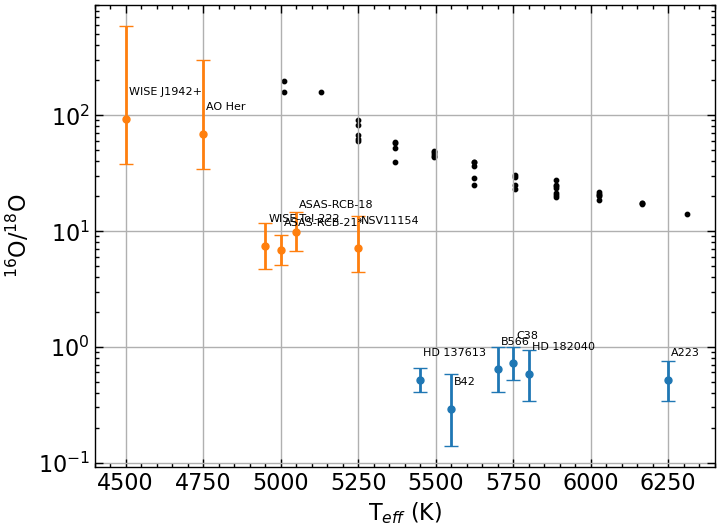

In [15]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
i = 1
# set random seed
np.random.seed(42705)
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    print(len(indices))
    n = len(indices)
    alternating_array = np.tile([1, -1], n // 2 + 1)[:n]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    # teffs2[indices] += alternating_array*50
    teffs2[indices] += shifts*0
    i *= -1
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
# plt.figure(figsize=(6, 4))
for i in range(len(oisorats)):
    plt.text(teffs2[i]+10, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i], label = labels[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.xlim(4400, 6400)
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$^{16}$O/$^{18}$O")
plt.scatter(teffmodel, ratmodel, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./plots/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)

In [16]:
ACs = results['A(C)'].values
ANs = results['A(N)'].values
dANs = results['dA(N)'].values
AOs = results['A(O)'].values
dAOs = results['dA(O)'].values

xFes = results['[Fe]'].values
AFes = xFes + solar_abundances['Fe']

o18rats = results['18Orat'].values
o18rat_errs = [(np.abs(results['18Orat_low'].values), results['18Orat_high'].values)]
o18rat_errs = [np.mean(o18rat_errs[i], axis=0) for i in range(len(o18rat_errs))][0]
o18rat_errs

array([0.054  , 0.116  , 0.077  , 0.084  , 0.103  , 0.1215 , 0.0335 ,
       0.0585 , 0.0126 , 0.01295, 0.033  , 0.048  ])

In [78]:
import pandas as pd
mun = pd.read_csv("./munson_table.csv", sep='\t')
munco = mun['C/O'].values
munrat = mun['^16O/^18O'].values
overshoot = mun['overshoot_f'].values
initH = mun['Initial ^1H'].values
mets = mun['Metallicity'].values

In [79]:
cms = ['xkcd:green' if met == "Solar" else 'xkcd:red' for met in mets]

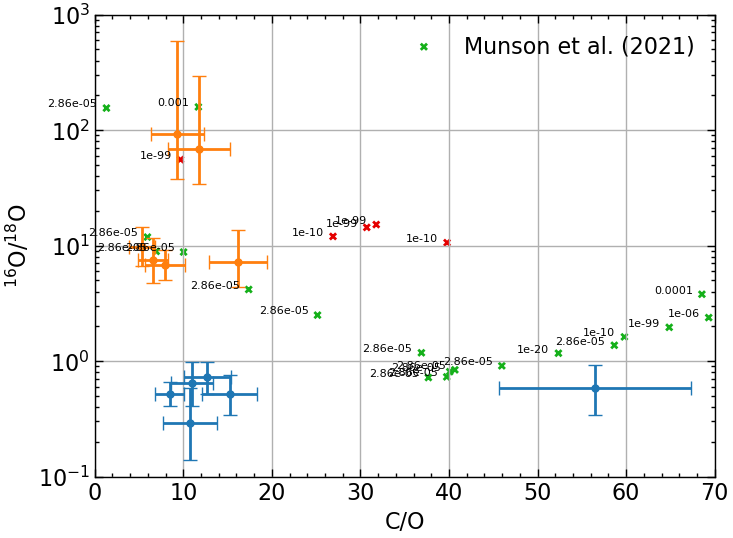

In [122]:
CO = ACs-AOs
dCO = np.log(10)*10**CO*dAOs
for i in range(len(oisorats)):
    # plt.text(teffs2[i]+10, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(10**CO[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = dCO[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.text(10**CO[i]*1.1, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    
# plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.ylim(1e-1, 1000)
plt.xlim(0,70 )
plt.scatter(munco, munrat, c=cms, s=20, marker = 'x', label = "Munson et al. (2021)")
for i in range(len(munco)):
    if munco[i] < 70 and munrat[i] < 2e2:
        plt.text(munco[i]-1, munrat[i]*1.2, f"{initH[i]}", fontsize=8, ha='right', va='top')
        # plt.text(munco[i]-1, munrat[i]*1.2, f"{overshoot[i]}", fontsize=8, ha='right', va='top')
plt.yscale('log')
plt.xlabel(r"C/O")
plt.ylabel(r"$^{16}$O/$^{18}$O")
plt.legend()
# plt.scatter(teffmodel, ratmodel, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()

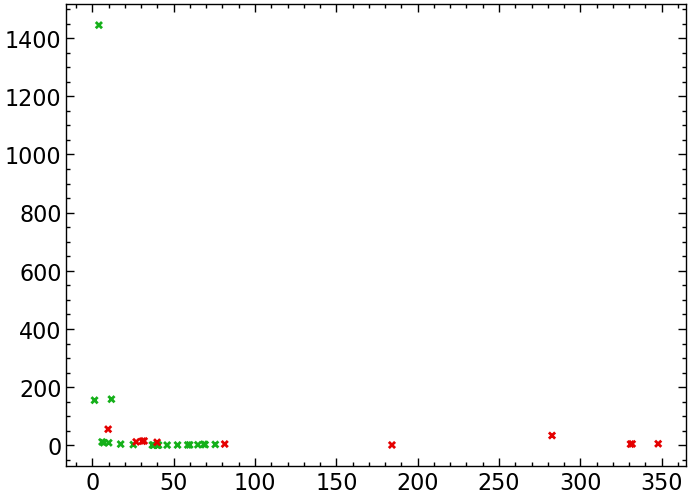

In [80]:
plt.scatter(munco, munrat, c=cms, s=20, marker = 'x', label = "Munson et al. (2018)")


In [204]:
model_an = props['log(N)_end']
model_rat = props['16O/18O']
model_f = 1/(1+model_rat)
model_ao = props['log(O)']
model_a18o = model_ao + np.log10(model_f)

In [205]:
model_a18o

0     7.285290
1     7.144546
2     7.276129
3     7.354969
4     7.434198
5     6.913947
6     7.030509
7     7.117269
8     7.189054
9     7.251306
10    6.386423
11    6.867942
12    7.177204
13    6.984803
14    7.270399
15    6.290275
16    6.824853
17    7.119443
18    6.890683
19    7.183859
20    6.380245
21    6.616968
22    6.670242
23    7.093624
24    7.216723
25    7.309965
26    7.341422
27    7.243974
28    7.345182
29    7.256591
30    7.267158
31    7.197739
32    7.208183
33    6.932275
34    6.992116
35    6.942715
36    6.899804
37    6.980939
38    6.815264
39    6.787568
40    6.756980
41    6.801832
dtype: float64

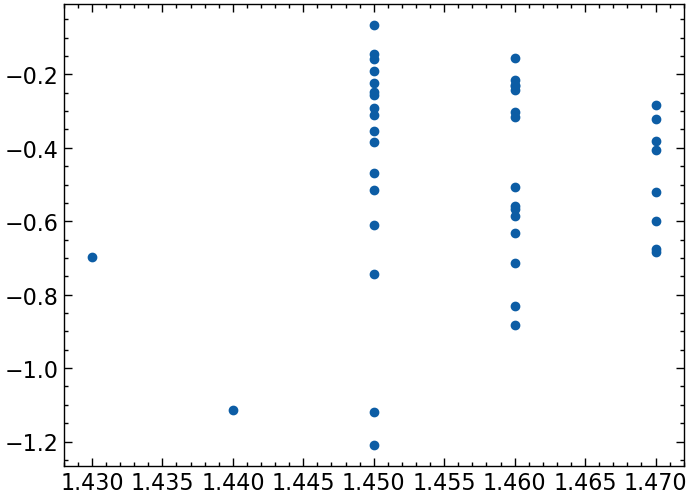

In [215]:
plt.scatter(model_an - 7.5+1, model_a18o - 7.5, label = "Model predictions (T-500)")

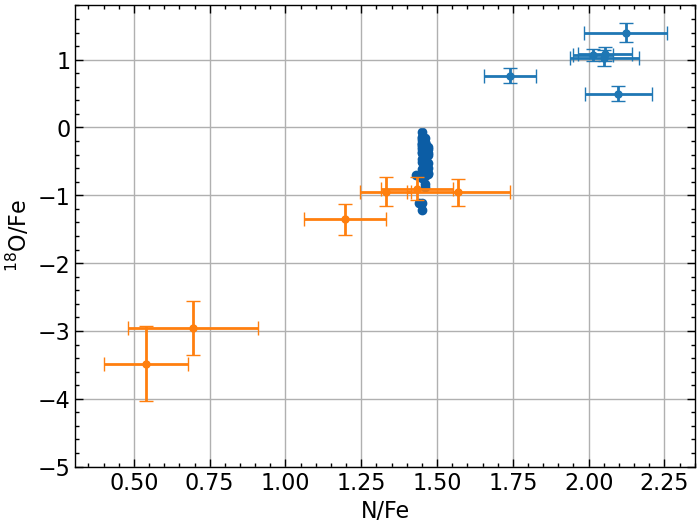

In [217]:
ao18errs = np.sqrt(dAOs**2 + (o18rat_errs/o18rats/np.log(10))**2)
# fig = plt.figure(figsize=(5, 4))
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    o18fe = np.log(o18rats[i])+AOs[i]-AFes[i]
    nfe = ANs[i]-AFes[i]
    # plt.text(nfe+0.1, o18fe-0.2, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(nfe, o18fe, xerr=dANs[i], yerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i], label = labels[i])
    # swap axes

    # fit a straight line using polyfit
plt.scatter(model_an - 7.5+1, model_a18o - 7.5, label = "Model predictions (T-500)")
# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)


plt.ylabel(r"$^{18}$O/Fe")
plt.xlabel(r"N/Fe")
xlim0 = plt.ylim()
plt.ylim(-5, xlim0[1])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xscale('log')
plt.grid()
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/nfe-v-o18fe.pdf", dpi=300)


2.7445075857292256 -4.5962047625415625


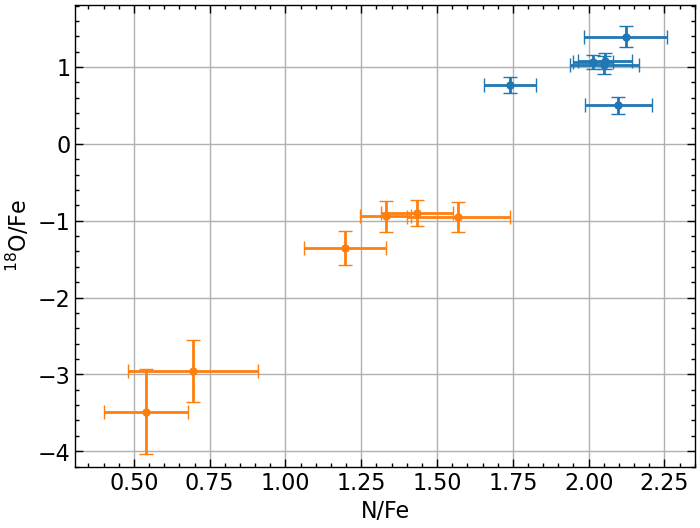

In [121]:
from scipy.optimize import curve_fit

# Assuming the following variables are defined in your notebook:
# oisorats, o18rats, AOs, AFes, ANs, dAOs, o18rat_errs, dANs, cs, labels

# Calculate ao18errs
ao18errs = np.sqrt(dAOs**2 + (o18rat_errs / o18rats / np.log(10))**2)

# Define the linear model
def linear_model(x, a, b):
    return a * x + b

# Prepare data for fitting
nfe = ANs - AFes
o18fe = np.log(o18rats) + AOs - AFes

# Perform the fit, accounting for errors in y
popt, pcov = curve_fit(linear_model, nfe, o18fe, sigma=ao18errs, absolute_sigma=True)

# Generate points for the fitted line
xs = np.linspace(np.min(nfe), np.max(nfe), 100)
yfit = linear_model(xs, *popt)
print(*popt)
# Plot the original data with error bars
# plt.figure(figsize=(8, 5))
for i in range(len(oisorats)):
    plt.errorbar(nfe[i], o18fe[i], xerr=dANs[i], yerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i], label=labels[i])

# Plot the fitted line
# plt.plot(xs, yfit, 'k--')

# Add labels and legend
plt.ylabel(r"$^{18}$O/Fe")
plt.xlabel(r"N/Fe")
xlim0 = plt.ylim()
plt.ylim(-4.2, xlim0[1])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.grid()
# plt.close()

# Save and show plot
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/nfe-v-o18fe.pdf", dpi=300)
# plt.show()

/tmp/ipykernel_254996/1374527011.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4959.25493364 4989.41221511]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  teffs2[indices] += shifts


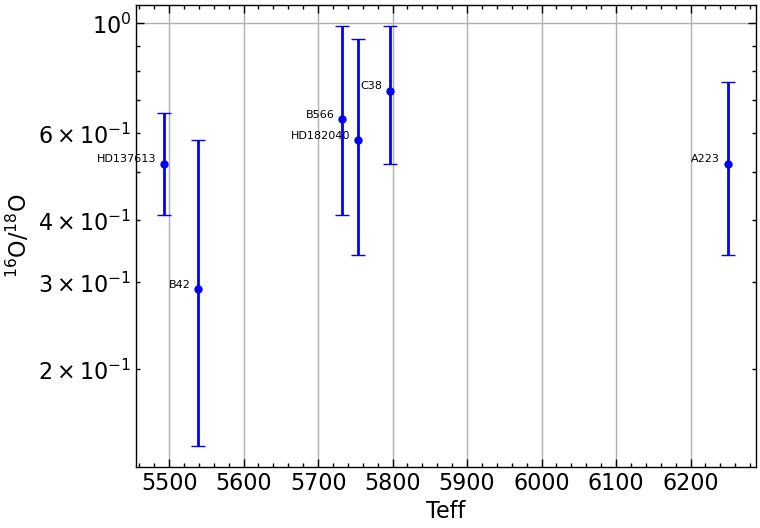

In [14]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    teffs2[indices] += shifts
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
for i in range(len(oisorats)):
    if i < 6:
        plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
        plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
# plt.ylim(0.01,1)
plt.xlabel("Teff")
plt.ylabel(r"$^{16}$O/$^{18}$O")
plt.grid()

In [86]:
ACs = results['A(C)'].values
ANs = results['A(N)'].values
dANs = results['dA(N)'].values
AOs = results['A(O)'].values
dAOs = results['dA(O)'].values

In [87]:
# xCs = ACs - solar_abundances['C']
# xNs = ANs - solar_abundances['N']
# xOs = AOs - solar_abundances['O']
xCs = ACs #- solar_abundances['C']
xNs = ANs #- solar_abundances['N']
xOs = AOs #- solar_abundances['O']

In [88]:
xFes = results['[Fe]']

In [89]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

In [90]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    teffs2[indices] += shifts
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)


/tmp/ipykernel_796709/2063691105.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4961.40338838 4950.65150506 4953.49056623]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  teffs2[indices] += shifts


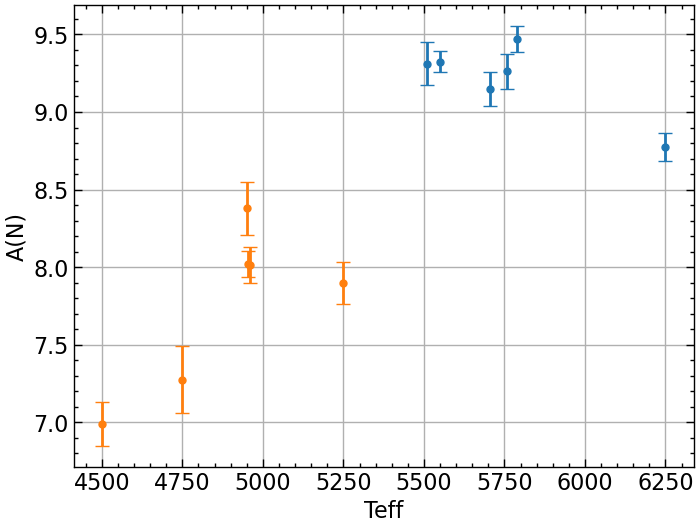

In [91]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xNs[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"A(N)")
plt.grid()

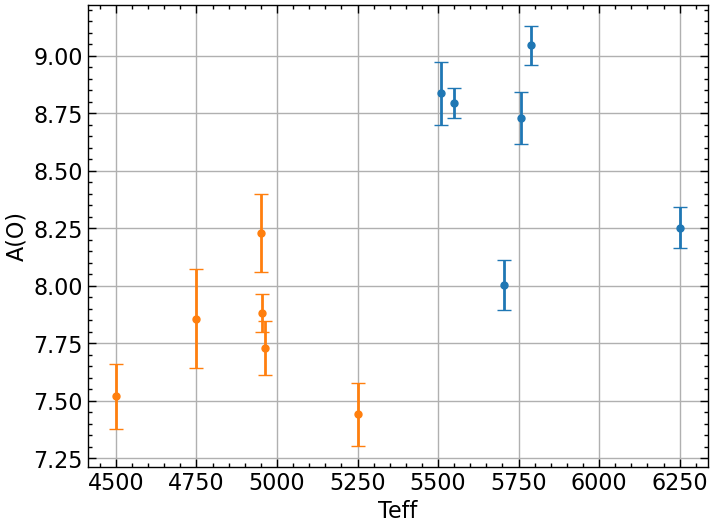

In [92]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xOs[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls
#S  ='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"A(O)")
plt.grid()

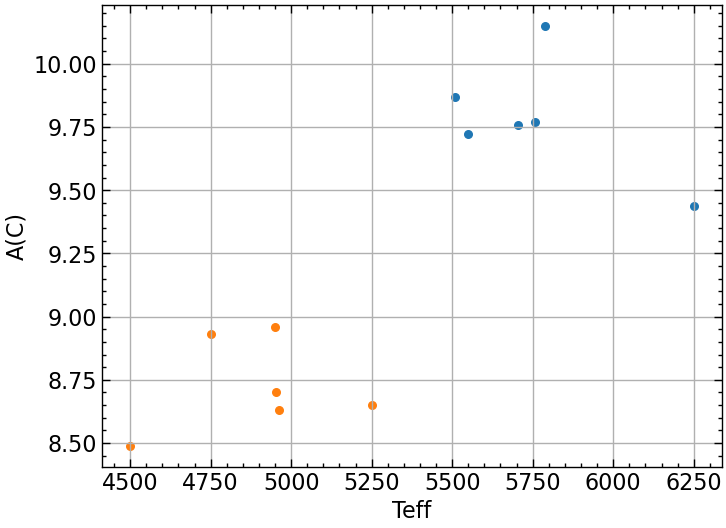

In [93]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(teffs2[i], xCs[i], c=cs[i], s = 30, marker = 'o')
    # plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"A(C)")
plt.grid()

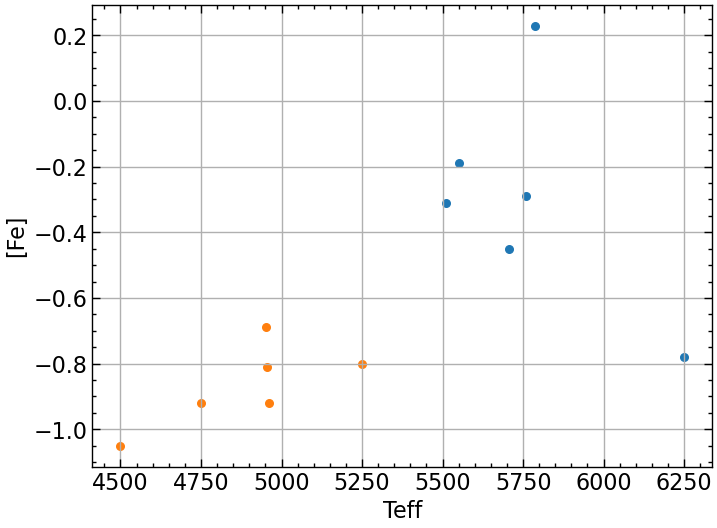

In [94]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(teffs2[i], xFes[i], c=cs[i], s = 30, marker = 'o')
    # plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[Fe]")
plt.grid()

In [95]:
xCs = ACs - solar_abundances['C']
xNs = ANs - solar_abundances['N']
xOs = AOs - solar_abundances['O']

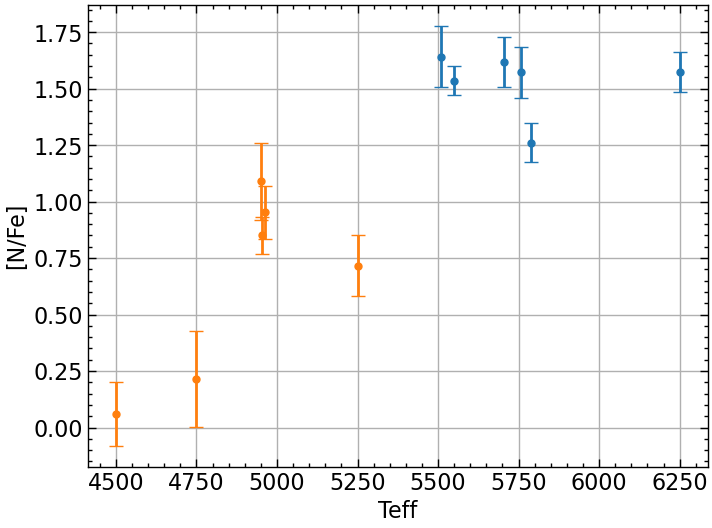

In [96]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[N/Fe]")
plt.grid()

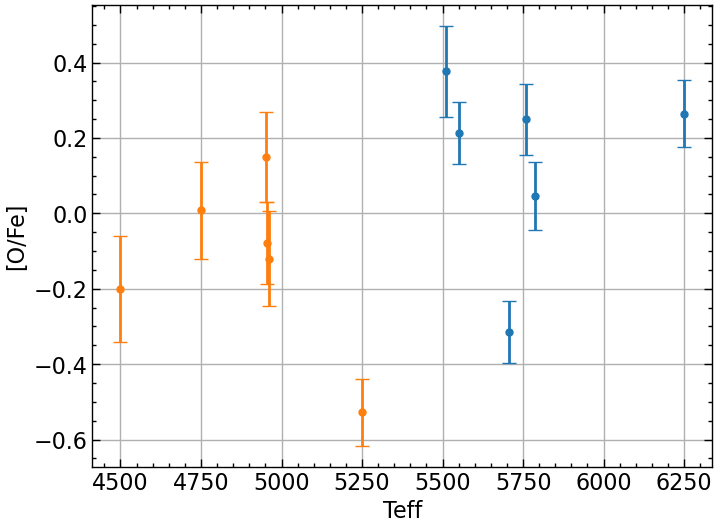

In [97]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xOs[i]-xFes[i], yerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log') 

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[O/Fe]")
plt.grid()

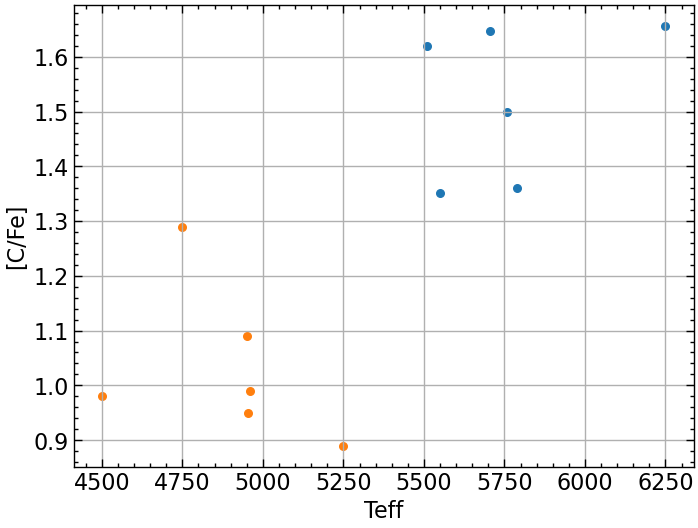

In [98]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(teffs2[i], xCs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    # plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[C/Fe]")
plt.grid()

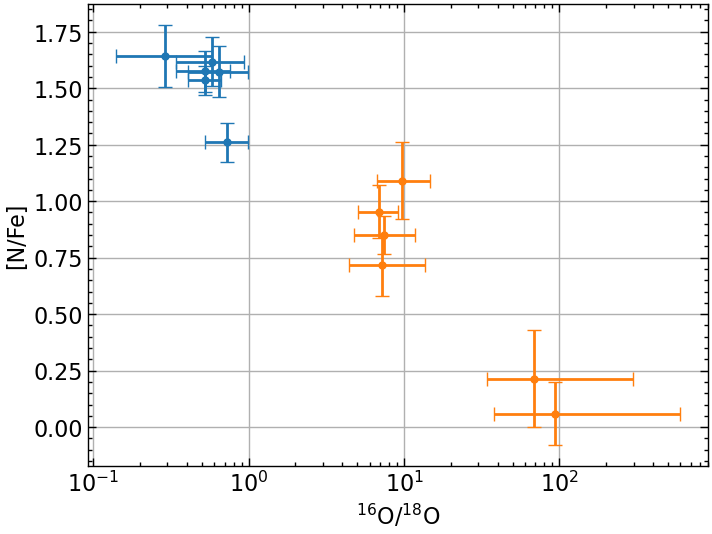

In [99]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(oisorats[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
    # fit a straight line using polyfit

x = oisorats
y = xNs-xFes
p = np.polyfit(x, y, 1)
xs = np.linspace(np.min(oisorats), np.max(oisorats), 100)
yfit = np.polyval(p, xs)
# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"$^{16}$O/$^{18}$O")
plt.ylabel(r"[N/Fe]")
plt.xscale('log')
plt.grid()

In [100]:
from scipy.optimize import curve_fit


In [101]:
o18rats = results['18Orat'].values
o18rat_errs = [(np.abs(results['18Orat_low'].values), results['18Orat_high'].values)]
o18rat_errs = [np.mean(o18rat_errs[i], axis=0) for i in range(len(o18rat_errs))][0]
o18rat_errs

array([0.054  , 0.116  , 0.077  , 0.084  , 0.103  , 0.1215 , 0.0335 ,
       0.0585 , 0.0126 , 0.01295, 0.033  , 0.048  ])

In [102]:
o18rats

array([0.66  , 0.634 , 0.577 , 0.635 , 0.608 , 0.777 , 0.128 , 0.123 ,
       0.0145, 0.0105, 0.093 , 0.118 ])

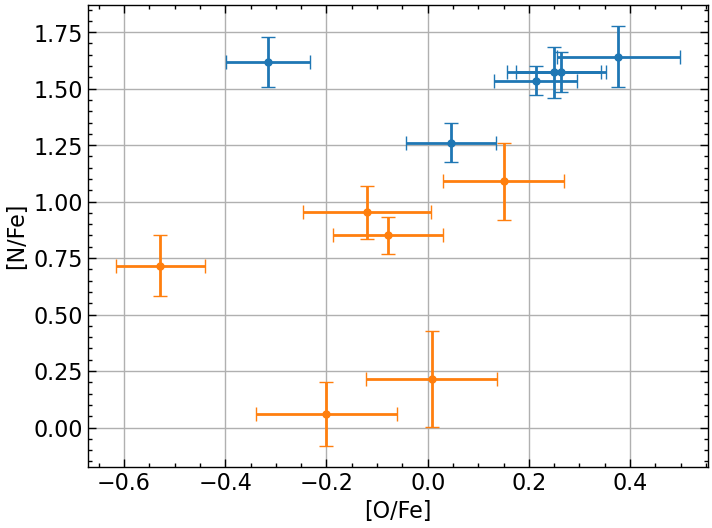

In [103]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # fit a straight line using polyfit

x = oisorats
y = xNs-xFes
p = np.polyfit(x, y, 1)
xs = np.linspace(np.min(oisorats), np.max(oisorats), 100)
yfit = np.polyval(p, xs)
# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"[O/Fe]")
plt.ylabel(r"[N/Fe]")
# plt.xscale('log')
plt.grid()

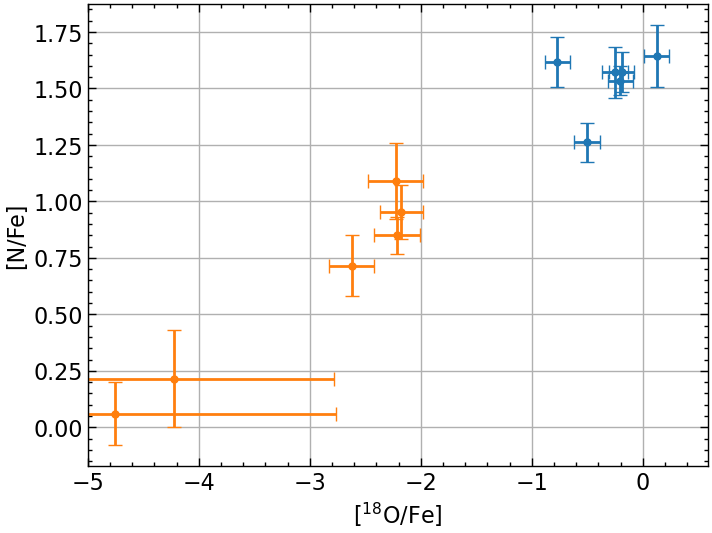

In [104]:
ao18errs = np.sqrt(dAOs[i]**2 + (o18rat_errs[i]/o18rats/np.log(10))**2)
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    
    # plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"[$^{18}$O/Fe]")
plt.ylabel(r"[N/Fe]")
ylim0 = plt.xlim()
plt.xlim(-5, ylim0[1])
# plt.xscale('log')
plt.grid()

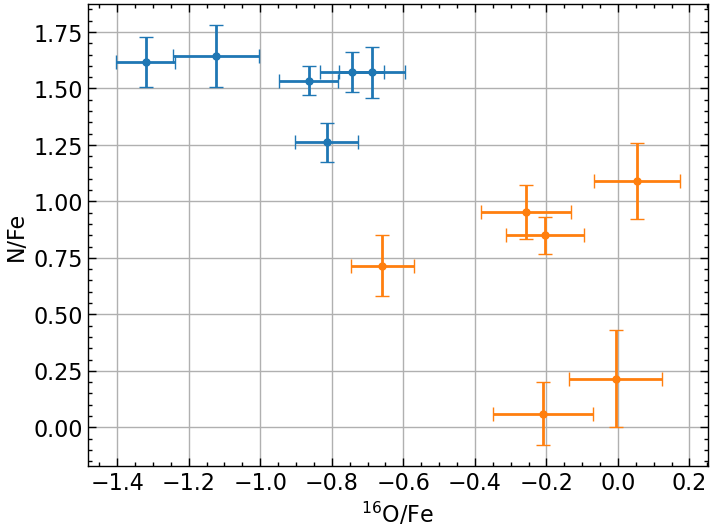

In [105]:
ao18errs = np.sqrt(dAOs[i]**2 + (o18rat_errs[i]/o18rats)**2)
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    
    # plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    plt.errorbar(np.log(1-o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"$^{16}$O/Fe")
plt.ylabel(r"N/Fe")
# plt.xscale('log')
plt.grid()

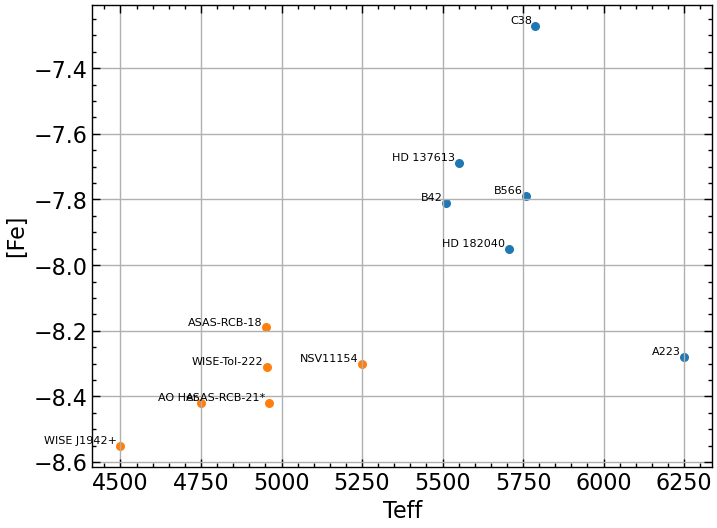

In [106]:
ao18errs = np.sqrt(dAOs[i]**2 + (o18rat_errs[i]/o18rats)**2)
for i in range(len(oisorats)):
    plt.text(teffs2[i]-10, xFes[i]-solar_abundances['Fe']+1e-3, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(teffs2[i], xFes[i]-solar_abundances['Fe'], c=cs[i], s = 30, marker = 'o')
    
    # plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.errorbar(np.log(1-o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"Teff")
plt.ylabel(r"[Fe]")
# plt.xscale('log')
plt.grid()

In [107]:
results

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),oisorat,oisorat_low,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.325,0.065,8.794,0.082,9.7214,0.52,-0.11,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.13,-0.09
1,HD 182040,dlHdC,5750,9.148,0.110,8.005,0.083,9.7570,0.58,-0.24,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.51,-0.15,-0.21
2,C38,dlHdC,5750,9.471,0.086,9.046,0.089,10.1510,0.73,-0.21,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.774,0.089,8.254,0.089,9.4370,0.52,-0.18,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.262,0.113,8.729,0.093,9.7690,0.64,-0.23,0.35,0.6080,-0.1050,0.1010,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.312,0.137,8.837,0.121,9.8690,0.29,-0.15,0.29,0.7770,-0.1450,0.0980,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21*,RCB,5000,8.013,0.118,7.730,0.126,8.6300,6.85,-1.77,2.30,0.1280,-0.0310,0.0360,-0.92,-1.37,-1.69,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.896,0.136,7.442,0.088,8.6500,7.18,-2.76,6.38,0.1230,-0.0540,0.0630,-0.80,-0.80,-0.85,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,7.275,0.214,7.858,0.129,8.9300,69.03,-34.66,227.74,0.0145,-0.0113,0.0139,-0.92,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.990,0.140,7.520,0.140,8.4900,92.93,-55.18,500.00,0.0105,-0.0105,0.0154,-1.05,-1.23,-1.75,-1.75,0.01,-0.57


In [108]:
xFes = results['[Fe]'] 
xNas = results['[Na]']
xMgs = results['[Mg]']
xCas = results['[Ca]']
xSs = results['[S]']
xSis = results['[Si]']
xCs = ACs - solar_abundances['C']
xNs = ANs - solar_abundances['N']
xOs = AOs - solar_abundances['O']

In [109]:
# iterate over all 5 elements and plot them against each other
elenames = ['C', 'N', 'O', 'Na', 'Mg', 'Ca', 'S', 'Si']
xelements = [xCs, xNs, xOs, xNas, xMgs, xCas, xSs, xSis]

C 1.4080000000000001 1.8270999999999997


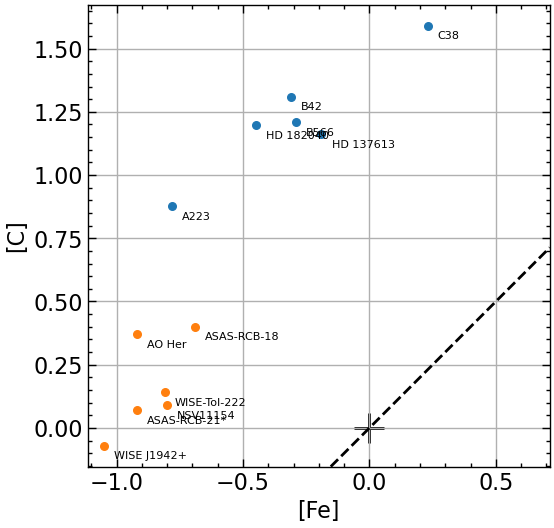

N 1.4080000000000001 2.7291


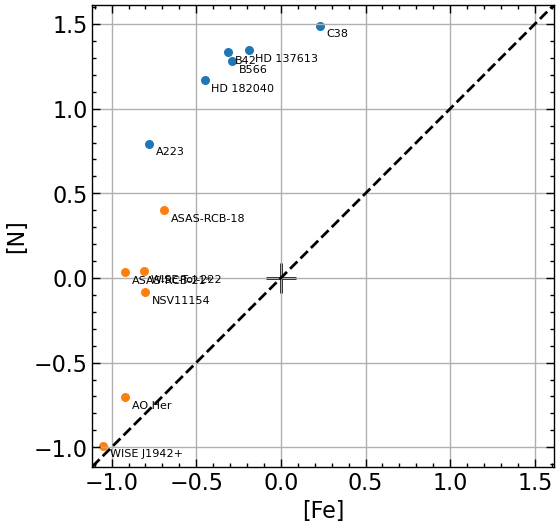

O 1.4080000000000001 1.7643999999999993


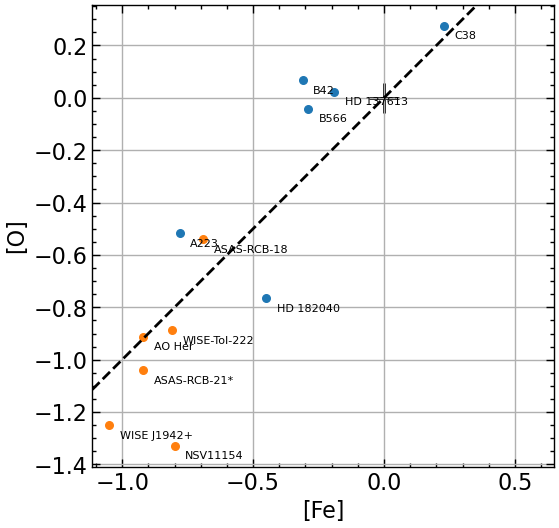

Na 1.4080000000000001 2.607


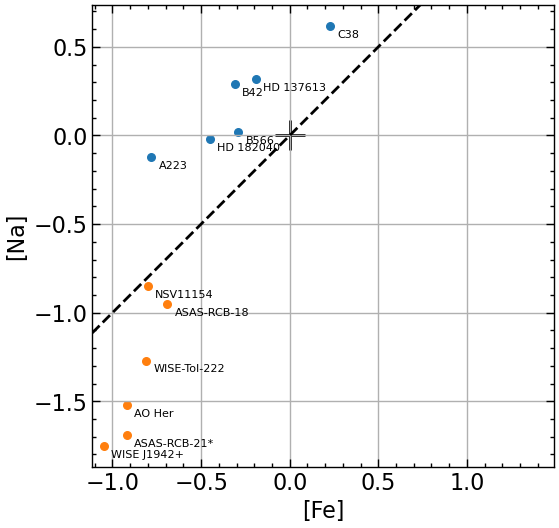

Mg 1.4080000000000001 2.321


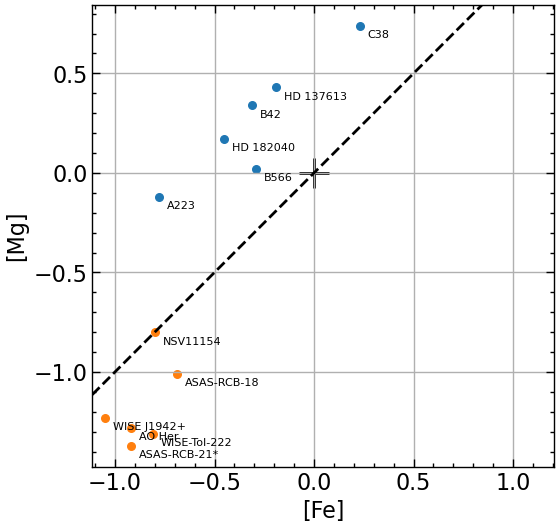

Ca 1.4080000000000001 1.991


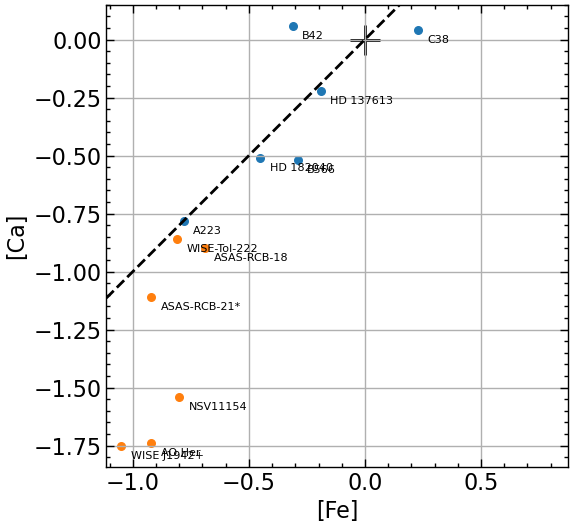

S 1.4080000000000001 1.177


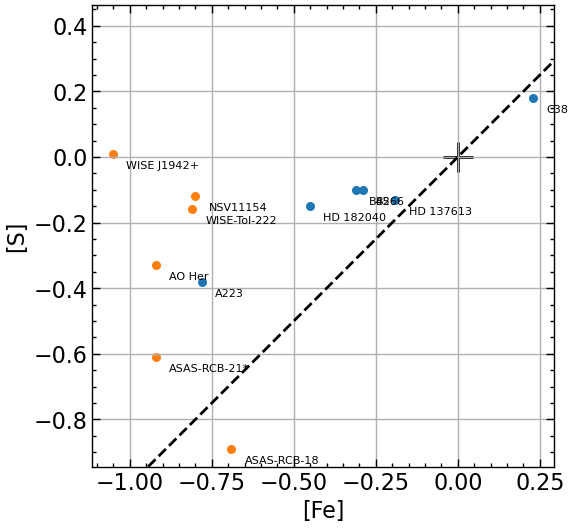

Si 1.4080000000000001 1.584


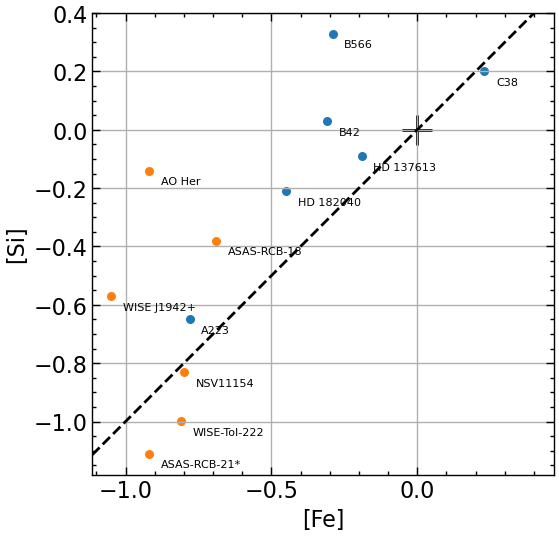

In [110]:
for j in range(len(xelements)):
    element = xelements[j]
    plt.figure()
    for i in range(len(oisorats)):
        plt.text(xFes[i] + 0.04, element[i] - 0.02, names[i], fontsize=8, ha='left', va='top')
        plt.scatter(xFes[i], element[i], c=cs[i], s=30, marker='o')
    plt.scatter(0, 0, c='k', marker='+', s=480)
    
    # Set labels
    plt.ylabel(fr"[{elenames[j]}]")
    plt.xlabel(r"[Fe]")
    
    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal')
    # plt.ylim(-1.5, 0.8)
    # Adjust axes limits to make them equal
    xspan = plt.xlim()[1] - plt.xlim()[0]
    yspan = plt.ylim()[1] - plt.ylim()[0]
    print(elenames[j], xspan, yspan)
    if xspan < yspan:
        plt.xlim(plt.xlim()[0], plt.xlim()[0] + yspan)
    else:
        plt.ylim(plt.ylim()[0], plt.ylim()[0] + xspan)
    
    # Draw a line y = x passing through the origin without modifying the axes limits
    plt.gca().axline((0, 0), slope=1, linestyle='--', color='k')
    
    # Add grid
    plt.grid()
    
    # Show plot
    plt.show()

In [111]:
idx = xelements.index(xNas)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

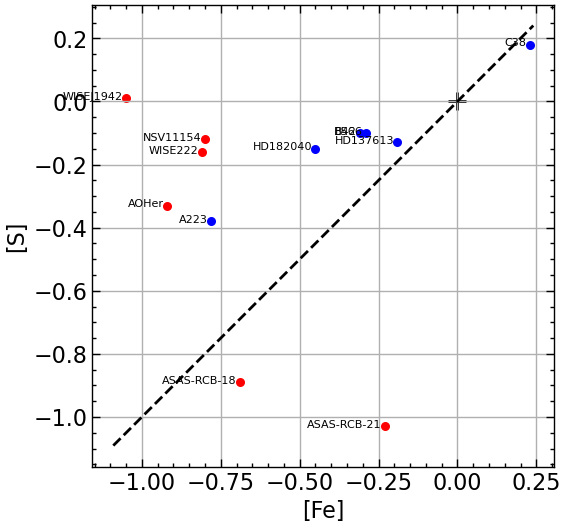

In [143]:
for i in range(len(oisorats)):
    plt.text(xFes[i]-0.01, xSs[i]-0.01, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(xFes[i], xSs[i], c=cs[i], s = 30, marker = 'o')
    
    # plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.errorbar(np.log(1-o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.scatter(0,0, c = 'k', marker='+', s= 180)
# make a straight line x=y extending to the axes limits and passing through origin
plt.plot(plt.ylim(), plt.ylim(), 'k--')
# plt.xlabel(r"[Fe]")
plt.ylabel(r"[S]")
plt.xlabel(r"[Fe]")
plt.gca().set_aspect('equal')
# plt.xscale('log')
plt.grid()